#### Part 1   |   Standard Difficulty Level

In this first part, you will be working with a datasets containing information of over 20k Software Professionals with different variables like: 

- the `Rating` of the company given by the employee,
- the `Company Name`, 
- the `Job Title` of the employee, 
- the employee `Salary` (in Indian Rupee ₹), 
- the number of `Salaries Reported`, 
- the `Location` of the company, 
- the `Employment Status` and
- the category of the `Job Roles` 

The dataset name is `Software Professionals Salary.csv` and you will find it in the `data` folder of this repository. At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) you can find the source of the data (Kaggle) as well as more information on its composition. 

**Setup:** Import the necessary libraries and load the .csv file to a DataFrame named `sps`. Check that all columns have the correct data type. 

In [1]:
import numpy as np
import pandas as pd 
import requests

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
sps_raw = pd.read_csv('Software Professionals Salary.csv')
sps = pd.DataFrame(sps_raw)
sps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


1. What is the shape (rows, cols) of the `sps` DataFrame? 

In [3]:
sps.shape

(22770, 8)

2. How many unique `Job Roles` are there in the dataset? 

In [4]:
sps['Job Roles'].unique()


array(['Android', 'Backend', 'Database', 'Frontend', 'IOS', 'Java',
       'Mobile', 'SDE', 'Python', 'Web', 'Testing'], dtype=object)

In [5]:
sps['Job Roles'].nunique()

11

3. How many unique `Job Title` are there for the "Python" `Job Role`? 

In [6]:
python_roles = sps[sps['Job Roles'].str.contains('Python', case=False)]
python_roles['Job Title'].nunique() 

102

4. Of the `Company Name`s that are listed in the DataFrame, **how many** have a "Python" `Job Role` with a `Job Title` containing the **substring** "Analyst"?

In [7]:
python_companies = python_roles[python_roles['Job Title'].str.contains('Analyst', case=False)]
python_companies

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
11352,3.7,Ocwen Financial,Python Analyst,500000,1,Bangalore,Full Time,Python
11371,4.0,TrioHats Consulting,Python and Machine Learning Analyst,100000,1,Bangalore,Full Time,Python
11541,3.3,Infosys,Technology Analyst - Python Developer,600000,1,Chennai,Full Time,Python


5. Which `Company Name` has the highest number of `Salaries Reported` (across all `Job Title`s)?

In [8]:
sps_sorted = sps.sort_values(by='Salaries Reported', ascending=False)
sps_sorted.head(1)


,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
19813,3.3,Infosys,Test Engineer,1104000,361,Hyderabad,Full Time,Testing


6. Given the `Company Name` you found at the previous question, how many `Location`s is this company present in? 

In [9]:
sps.isnull().sum()

Rating               0
Company Name         1
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [10]:
sps = sps.dropna()

In [11]:
infosys = sps[sps['Company Name'] == 'Infosys'] 
infosys['Location'].nunique()

9

7. As you may have noticed, the `Salary` is reported in Indian Rupees (ISO code: INR). Using the [Open Access Endpoint](https://www.exchangerate-api.com/docs/free) (no API Key required) of the ExchangeRate-API service, create a new column named `Salary USD` containing the salary-equivalent in USD and round the result to zero decimals. What is the conversion rate between USD-INR at the time of your execution? *Note: of course, this result will change in time*

In [12]:
def get_conversion_rate():
    response = requests.get('https://open.er-api.com/v6/latest/USD')
    data = response.json()
    conversion_rate = data['rates']['INR']
    return conversion_rate

conversion_rate = get_conversion_rate()
sps['Salary USD'] = sps['Salary'] / conversion_rate
sps['Salary USD'] = sps['Salary USD'].round(0)

sps


,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Salary USD
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android,4880.0
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android,4880.0
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android,12200.0
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android,3660.0
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android,7320.0
...,...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web,2440.0
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web,3660.0
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web,2342.0
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web,3660.0


In [13]:
print(conversion_rate)

81.966272


8. What is the average `Salary USD` for the "Python" `Job Role`? 

In [14]:
python_roles['Salary USD'] = python_roles['Salary'] / conversion_rate
python_roles['Salary USD'] = python_roles['Salary USD'].round(0)
python_roles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 947 entries, 10896 to 11862
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             947 non-null    float64
 1   Company Name       947 non-null    object 
 2   Job Title          947 non-null    object 
 3   Salary             947 non-null    int64  
 4   Salaries Reported  947 non-null    int64  
 5   Location           947 non-null    object 
 6   Employment Status  947 non-null    object 
 7   Job Roles          947 non-null    object 
 8   Salary USD         947 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 74.0+ KB


In [15]:

python_roles['Salary USD'].mean()


5929.514255543822

9. Which `Company Name` has the highest **average** `Salary EUR` across all `Job Title`s? 

In [16]:
def get_conversion_rate_eur():
    response = requests.get('https://open.er-api.com/v6/latest/EUR')
    data1 = response.json()
    conversion_rate_eur = data1['rates']['INR']
    return conversion_rate_eur

conversion_rate_eur = get_conversion_rate_eur()
sps['Salary EUR'] = sps['Salary'] / conversion_rate_eur
sps['Salary EUR'] = sps['Salary EUR'].round(0)

avg_salary_eur = pd.DataFrame(sps.groupby('Company Name')['Salary EUR'].mean())
avg_salary_eur.sort_values('Salary EUR', ascending=False).head()



,Salary EUR
Company Name,
Thapar University,1008007.0
FFF Enterprises,109761.0
Digital Raju,109761.0
Gaana Lyrics Point.com,108641.0
GGH Heavy Industries,107521.0


10. Create a Plot that shows the **relationship** between the average `Salary EUR` and the average `Rating` for each `Company Name`. Do you see any anomaly in the plot? Which is the `Company Name` that is causing this oddity?

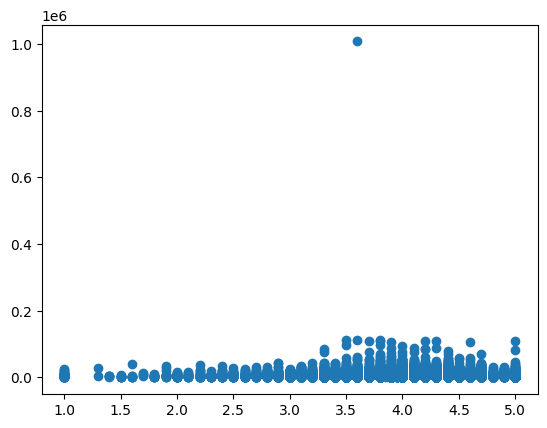

In [17]:
x = sps['Rating']
y = sps['Salary EUR']

plt.scatter(x, y)
plt.show()

In [18]:
sps.sort_values('Salary EUR', ascending=False).head(1)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Salary USD,Salary EUR
18635,3.6,Thapar University,Software Development Engineer (SDE),90000000,1,New Delhi,Full Time,SDE,1098013.0,1008007.0
